# 3D reconstruction
---

In [50]:
import matplotlib.pyplot as plt

from p3droslo.observation import DataCube

In [9]:
file     = '/STER/frederikd/Deprojection/data/observations/IKTau_CO3-2.fits'
datacube = DataCube(file)

In [11]:
datacube.plot_channel_maps()

interactive(children=(IntSlider(value=30, description='f', max=60), Output()), _dom_classes=('widget-interact'…

<function p3droslo.observation.DataCube.plot_channel_maps.<locals>.plot(f)>

In [15]:
datacube.img.size

3997696

In [28]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader
from torch.optim      import Adam, LBFGS

In [4]:
# Model Hyperparameters
cuda   = False
DEVICE = torch.device("cuda" if cuda else "cpu")

In [23]:
class TensorModel():
    """
    A deterministic model in which every variable is represented by a 3-tensor.
    """
    
    def __init__(self, dim):
        
        self.dim = dim
        
        self.density     = torch.rand(self.dim, requires_grad=True)
        self.temperature = torch.rand(self.dim, requires_grad=True)
    
    def parameters()

dim = (100, 100, 100)

In [35]:
density = torch.rand(dim, requires_grad=True)
ones    = torch.ones(dim)

In [55]:
optimizer = Adam([density], lr=1.0e-2)

In [60]:
losses = []

for _ in range(100):

    loss = nn.functional.mse_loss(density, ones)
    
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss     .backward ()
    optimizer.step     ()

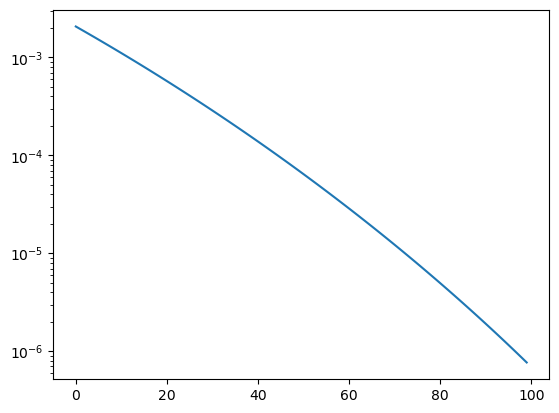

In [61]:
plt.plot(losses)
plt.yscale('log')

In [62]:
density

tensor([[[1.0000, 1.0002, 1.0000,  ..., 1.0000, 0.9980, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9999, 1.0000, 1.0001],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 0.9979, 1.0000,  ..., 1.0002, 0.9989, 1.0002],
         [1.0000, 0.9997, 0.9985,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 0.9999,  ..., 1.0000, 1.0000, 1.0000],
         [1.0002, 1.0002, 1.0002,  ..., 1.0000, 1.0000, 1.0002],
         [1.0000, 1.0001, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9999, 1.0000, 1.0000,  ..., 0.9981, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9964, 1.0000, 1.0000]],

        [[0.9952, 1.0000, 1.0000,  ..., 0.9980, 1.0000, 0.9977],
         [1.0000, 0.9999, 1.0001,  ..., 0.9999, 1.0000, 1.0001],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9999, 1.

In [ ]:
class Data(Dataset):
    def __init__(self, datacube):
        self.datacube = datacube
    
    def __len__(self):
        return self.datacube.img.size

    def __getitem__(self, idx):
        return self.datacube.img[idx]